<a href="https://colab.research.google.com/github/Jiu1924/Credit_Card_Fraud_Detection/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload() # Manually upload kaggle.json

Saving Fraudulent_online_shops_dataset.csv to Fraudulent_online_shops_dataset.csv


{'Fraudulent_online_shops_dataset.csv': b'Online shop URL,Label,Domain length,Top domain length,Presence of prefix \'www\' ,Number  of digits,Number  of letters,Number  of dots (.),Number  of hyphens (-),Presence of credit card payment,Presence of money back payment,Presence of cash on delivery payment,Presence of crypto currency,Presence of free contact emails,Presence of logo URL,SSL certificate issuer,SSL certificate expire date,Issuer organization,SSL certificate issuer organization list item,Indication of young domain ,Domain registration date,Presence of TrustPilot reviews,TrustPilot score,Presence of SiteJabber reviews,Presence in the standard Tranco list,Tranco List rank\r\nhttps://www.livingandcompany.com/en,legitimate,24,3,1,0,29,2,0,1,1,1,0,0,1,Cloudflare Inc ECC CA-3,Apr  1 23:59:59 2024 GMT,"Cloudflare, Inc.",1,0,12-11-13 18:10,1,1,0,0,-1\r\nhttps://www.jeans24h.eu,legitimate,15,2,1,2,16,2,0,0,1,1,0,2,1,Certum Domain Validation CA SHA2,Apr  2 07:42:59 2024 GMT,Unizeto Tech

In [2]:
import re
import sys
import numpy as np
import pandas as pd
import urllib.parse
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [3]:
import pandas as pd
df = pd.read_csv("Fraudulent_online_shops_dataset.csv") # Replace with your dataset's file path
# --- 2.Preprocessing (Adapt to your specific dataset) ---
# Replace 'label' with the correct column name if necessary
target_column = 'Label'  # Replace with the actual column name

if target_column not in df.columns:
    print(f"Error: '{target_column}' column not found.")
    print("Columns in the dataframe are:")
    print(df.columns)
    exit()

X = df.drop(target_column, axis=1) # Features
y = df[target_column] # Target Variable

print(df.head()) #to view the first few lines of the dataframe.

                       Online shop URL       Label  Domain length  \
0  https://www.livingandcompany.com/en  legitimate             24   
1              https://www.jeans24h.eu  legitimate             15   
2        https://www.monsieurtshirt.eu  legitimate             21   
3             https://www.swaens.nl/en  legitimate             13   
4         https://www.tyent-europe.com  legitimate             20   

   Top domain length  Presence of prefix 'www'   Number  of digits  \
0                  3                          1                  0   
1                  2                          1                  2   
2                  2                          1                  0   
3                  2                          1                  0   
4                  3                          1                  0   

   Number  of letters  Number  of dots (.)  Number  of hyphens (-)  \
0                  29                    2                       0   
1                  16   

In [4]:
#--------------------Data Imbalancing----------------------------

import pandas as pd
# --- 1. Load the Dataset (Replace with your actual file path) ---
try:
    df = pd.read_csv("Fraudulent_online_shops_dataset.csv")
except FileNotFoundError:
    print("Error: Dataset file not found.")
    exit()
df.head()

,Online shop URL,Label,Domain length,Top domain length,Presence of prefix 'www',Number of digits,Number of letters,Number of dots (.),Number of hyphens (-),Presence of credit card payment,...,SSL certificate expire date,Issuer organization,SSL certificate issuer organization list item,Indication of young domain,Domain registration date,Presence of TrustPilot reviews,TrustPilot score,Presence of SiteJabber reviews,Presence in the standard Tranco list,Tranco List rank
0,https://www.livingandcompany.com/en,legitimate,24,3,1,0,29,2,0,1,...,Apr 1 23:59:59 2024 GMT,"Cloudflare, Inc.",1,0,12-11-13 18:10,1,1.0,0,0,-1
1,https://www.jeans24h.eu,legitimate,15,2,1,2,16,2,0,0,...,Apr 2 07:42:59 2024 GMT,Unizeto Technologies S.A.,11,2,Hidden,1,2.8,0,0,-1
2,https://www.monsieurtshirt.eu,legitimate,21,2,1,0,24,2,0,1,...,Apr 3 23:59:59 2024 GMT,Amazon,6,2,Hidden,0,-1.0,0,0,-1
3,https://www.swaens.nl/en,legitimate,13,2,1,0,18,2,0,1,...,Apr 4 23:59:59 2024 GMT,"Cloudflare, Inc.",1,0,28-08-11 0:00,0,-1.0,0,0,-1
4,https://www.tyent-europe.com,legitimate,20,3,1,0,22,2,1,1,...,Apr 5 10:04:35 2024 GMT,Unizeto Technologies S.A.,11,0,08-08-12 11:42,0,-1.0,0,0,-1


In [5]:
from sklearn.model_selection import train_test_split
# --- 3. Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [6]:
# --- 4. Check Class Imbalance (Optional, but recommended) ---
print("Original class distribution:")
print(y_train.value_counts())

Original class distribution:
Label
fraudulent    463
legitimate    449
Name: count, dtype: int64


In [7]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a sample imbalanced dataset (replace with your actual data if needed)
X, y = make_classification(
    n_classes=2,
    weights=[0.9, 0.1],  # Simulate a 90/10 class imbalance
    random_state=42,
    n_samples=1141,
)

# Create a Pandas DataFrame for easier handling
df = pd.DataFrame(X)
df['Label'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Label', axis=1), df['Label'], test_size=0.2, random_state=42
)

# Check the original class distribution
print("Original class distribution (y_train):")
print(pd.Series(y_train).value_counts())

# Apply SMOTE Oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("\nClass distribution after SMOTE (y_train_smote):")
print(pd.Series(y_train_smote).value_counts())

# Apply Random Undersampling to the SMOTE-oversampled data
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_smote, y_train_smote)

# Check the final balanced class distribution
print("\nBalanced class distribution (y_train_resampled after SMOTE and Random Undersampling):")
print(pd.Series(y_train_resampled).value_counts())

#X_test and y_test can be used for final model evaluation

Original class distribution (y_train):
Label
0    827
1     85
Name: count, dtype: int64

Class distribution after SMOTE (y_train_smote):
Label
0    827
1    827
Name: count, dtype: int64

Balanced class distribution (y_train_resampled after SMOTE and Random Undersampling):
Label
0    827
1    827
Name: count, dtype: int64


In [8]:
# --- 6. Train a Model (Random Forest as an example) ---
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [9]:
# --- 7. Evaluate the Model ---
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability for ROC AUC

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_pred_proba))



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       197
           1       0.87      0.84      0.86        32

    accuracy                           0.96       229
   macro avg       0.92      0.91      0.92       229
weighted avg       0.96      0.96      0.96       229


ROC AUC Score:
0.983899111675127


In [10]:
#-------------------Feature Engineering-----------------------

def feature_engineer(df):
    """Performs feature engineering on the online shops dataset."""
    df['domain_length'] = df['Online shop URL'].apply(lambda x: len(urllib.parse.urlparse(x).netloc))
    df['path_length'] = df['Online shop URL'].apply(lambda x: len(urllib.parse.urlparse(x).path))
    df['has_ip_address'] = df['Online shop URL'].apply(lambda x: 1 if re.search(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', x) else 0)
    df['https'] = df['Online shop URL'].apply(lambda x: 1 if urllib.parse.urlparse(x).scheme == 'https' else 0)
    df['dot_count'] = df['Online shop URL'].apply(lambda x: x.count('.'))
    df['url_length'] = df['Online shop URL'].apply(len)
    return df

def balance(X, y, method='smote'):
    b = {'smote': SMOTE(random_state=42), 'rus': RandomUnderSampler(random_state=42)}
    res = b[method].fit_resample(X, y)
    return res

import pandas as pd
try:
    df = pd.read_csv("Fraudulent_online_shops_dataset.csv")
except FileNotFoundError:
    print("File not found.")
    sys.exit()

df = feature_engineer(df)

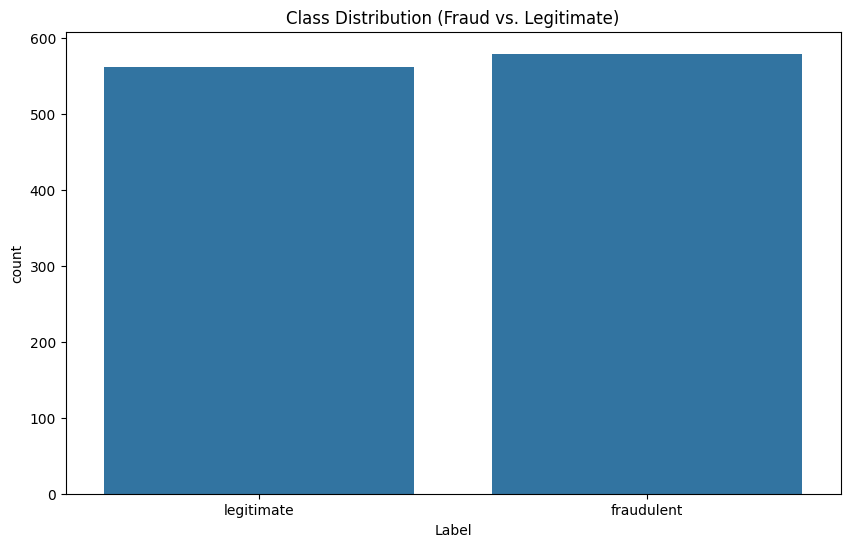

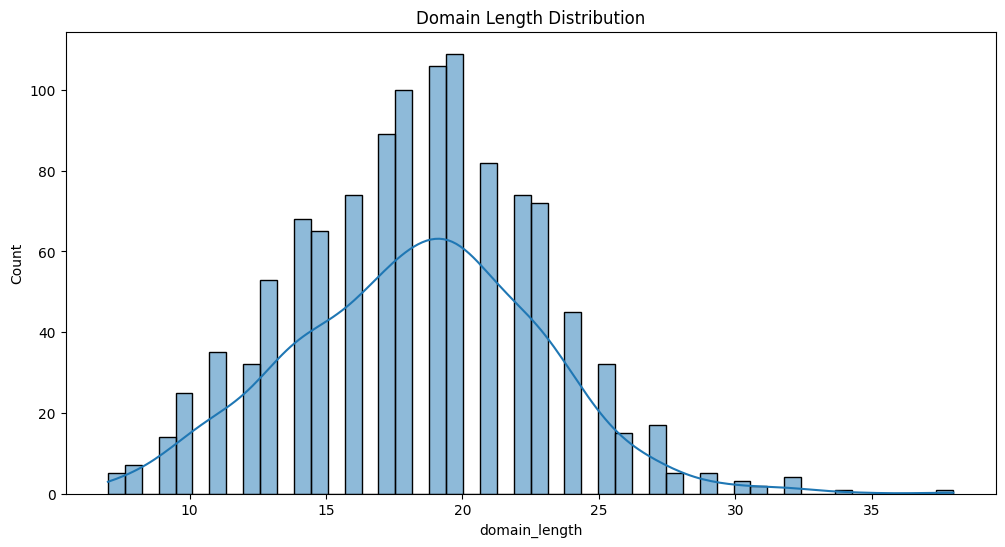

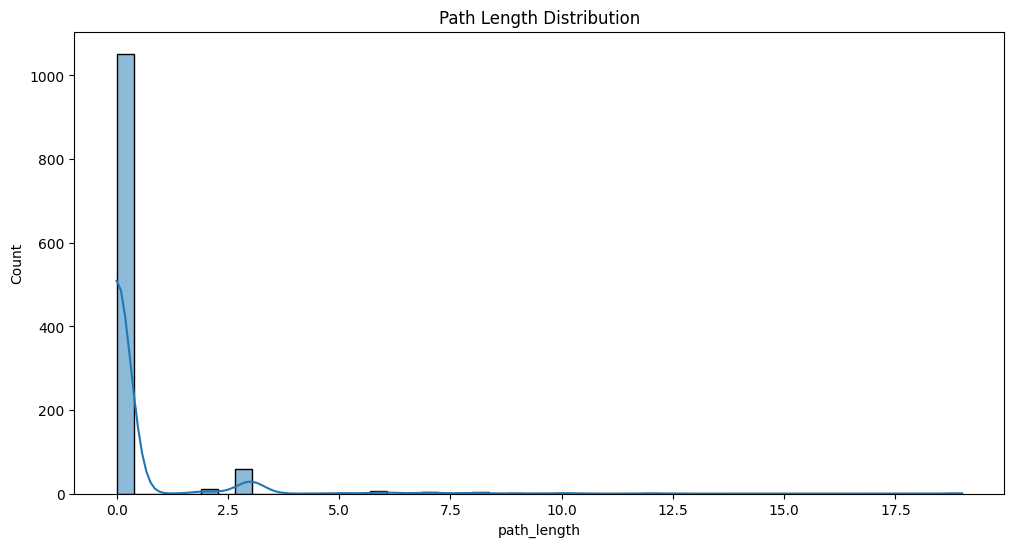

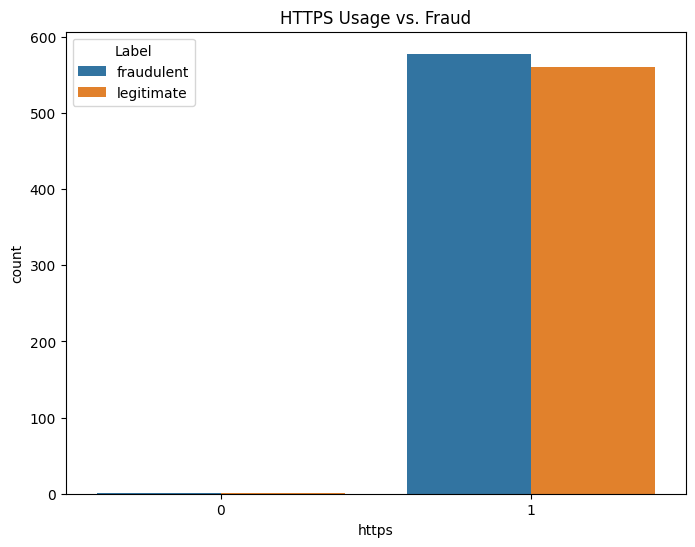

In [11]:
import matplotlib.pyplot as plt
# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=df)
plt.title('Class Distribution (Fraud vs. Legitimate)')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['domain_length'], bins=50, kde=True)
plt.title('Domain Length Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['path_length'], bins=50, kde=True)
plt.title('Path Length Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='https', hue='Label', data=df)
plt.title('HTTPS Usage vs. Fraud')
plt.show()


In [17]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming you have X_train and X_test DataFrames already loaded

non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)

X_train_numeric = X_train.drop(non_numeric_cols, axis=1)
X_test_numeric = X_test.drop(non_numeric_cols, axis=1)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_numeric), columns=X_train_numeric.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_numeric), columns=X_test_numeric.columns)

# Now you can use X_train_imputed and X_test_imputed for your model

Non-numeric columns: ['Online shop URL', 'SSL certificate issuer', 'SSL certificate expire date', 'Issuer organization', 'Domain registration date']


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming 'df' is your DataFrame and 'Label' is your target variable

# 1. Drop or Encode non-numeric columns from 'df' if present
# Example:
# if 'certificate' in df.columns:
#     df = df.drop('certificate', axis=1)

# 2. Separate features (X) and target (y)
X = df.drop('Label', axis=1)
y = df['Label']

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Handle NaNs and Infinities in X_train
X_train = X_train.replace([np.inf, -np.inf], np.nan)
imputer = SimpleImputer(strategy='mean')
numeric_cols = X_train.select_dtypes(include=np.number).columns
X_train = X_train[numeric_cols]
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=numeric_cols)

# 5. Handle NaNs in y_train (using mode for categorical target)
y_train = y_train.fillna(y_train.mode()[0])

# 6. Balance the training data using SMOTE
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_train, y_train)

# 7. Train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_bal, y_bal)

# 8. Model Evaluation
print("Model Evaluation:")

# Ensure X_test does not have the problematic column. If it does, drop it.
# Example:
# if 'certificate' in X_test.columns:
#     X_test = X_test.drop('certificate', axis=1)

# Handle NaNs and Infinities in X_test
X_test = X_test.replace([np.inf, -np.inf], np.nan)
numeric_cols = X_train.select_dtypes(include=np.number).columns
X_test = X_test[numeric_cols]
X_test = pd.DataFrame(imputer.transform(X_test), columns=numeric_cols)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
try:
    precision = precision_score(y_test, y_pred, average='weighted')
except ValueError as e:
    print(f"Error calculating precision: {e}")
    precision = None  # Or handle the error in another way
0.
try:
    recall = recall_score(y_test, y_pred, average='weighted')
except ValueError as e:
    print(f"Error calculating recall: {e}")
    recall = None  # Or handle the error in another way
try:
    f1 = f1_score(y_test, y_pred, average='weighted')
except ValueError as e:
    print(f"Error calculating F1 score: {e}")
    f1 = None  # Or handle the error in another way
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation:
Accuracy: 0.9912
Precision: 0.9914
Recall: 0.9912
F1 Score: 0.9912
ROC AUC: 0.9997

Classification Report:
              precision    recall  f1-score   support

  fraudulent       1.00      0.98      0.99       116
  legitimate       0.98      1.00      0.99       112

    accuracy                           0.99       228
   macro avg       0.99      0.99      0.99       228
weighted avg       0.99      0.99      0.99       228



Feature Importance:
                                          Feature  Importance
16                               TrustPilot score    0.318458
14                    Indication of young domain     0.214891
15                 Presence of TrustPilot reviews    0.097067
11                Presence of free contact emails    0.088364
1                               Top domain length    0.053115
13  SSL certificate issuer organization list item    0.038494
12                           Presence of logo URL    0.034458
20                                  domain_length    0.023239
4                              Number  of letters    0.017676
0                                   Domain length    0.017512
8                  Presence of money back payment    0.017465
21                                    path_length    0.014929
25                                     url_length    0.012418
7                 Presence of credit card payment    0.011629
9            Presence of cash on delivery payment 

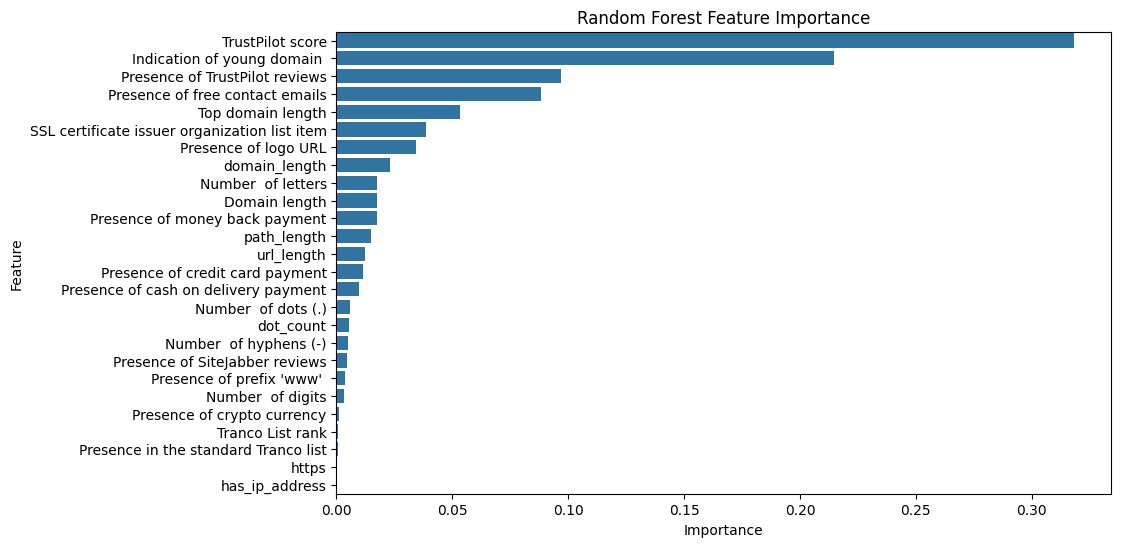

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'Label' is your target variable

# 1. Drop or Encode non-numeric columns from 'df' if present
# Example:
# if 'certificate' in df.columns:
#     df = df.drop('certificate', axis=1)

# 2. Separate features (X) and target (y)
X = df.drop('Label', axis=1)
y = df['Label']

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Handle NaNs and Infinities in X_train
X_train = X_train.replace([np.inf, -np.inf], np.nan)  # Replace infinities with NaNs
imputer = SimpleImputer(strategy='mean')
numeric_cols = X_train.select_dtypes(include=np.number).columns
X_train = X_train[numeric_cols]

# 5. Handle NaNs in y_train
if pd.api.types.is_numeric_dtype(y_train):  # Check if y_train is numeric
    y_train = y_train.fillna(y_train.mean())
else:
    y_train = y_train.fillna(y_train.mode()[0])

# 6. Balance the training data (if needed) using SMOTE or your 'balance()' function
smote = SMOTE(random_state=42)  # If you are using SMOTE
# Assuming X_train and y_train are your DataFrames/Series

# 1. Handle missing values in X_train
X_train = X_train.replace([np.inf, -np.inf], np.nan)
imputer = SimpleImputer(strategy='mean') # Or another strategy
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# 2. Handle missing values in y_train
if pd.api.types.is_numeric_dtype(y_train):
    y_train = y_train.fillna(y_train.mean())
else:
    y_train = y_train.fillna(y_train.mode()[0])

# 3. Encode categorical features in X_train (if needed)
# Example: One-Hot Encoding
# categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
# X_train = pd.get_dummies(X_train, columns=categorical_cols)

# 4. Apply SMOTE
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_train, y_train)

# 7. Train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_bal, y_bal)

# 8. Feature Importance
feature_importances = model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importance:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()

Training and evaluating Logistic Regression...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Training and evaluating Random Forest...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Training and evaluating Gradient Boosting...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Training and evaluating SVM...
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Model Evaluation Results:

Logistic Regression:
  Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
  Accuracy: 0.8816
  Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78        58
           1       0.94      0.89      0.92       170

    accuracy                           0.88       228
   macro avg       0.84      0.87      0.85       228
weighted avg       0.89      0.88      0.88       228

  Confusion Matrix:
 [[ 49   9]
 [ 18 152]]


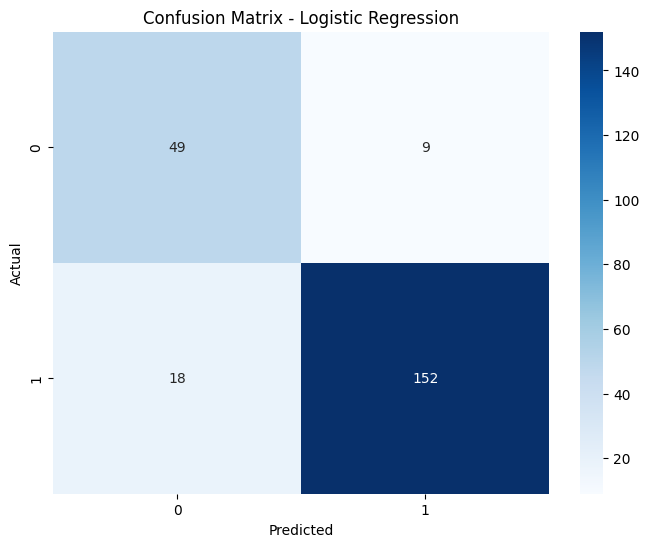


Random Forest:
  Best Parameters: {'max_depth': None, 'n_estimators': 100}
  Accuracy: 0.7939
  Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.21      0.34        58
           1       0.79      0.99      0.88       170

    accuracy                           0.79       228
   macro avg       0.85      0.60      0.61       228
weighted avg       0.82      0.79      0.74       228

  Confusion Matrix:
 [[ 12  46]
 [  1 169]]


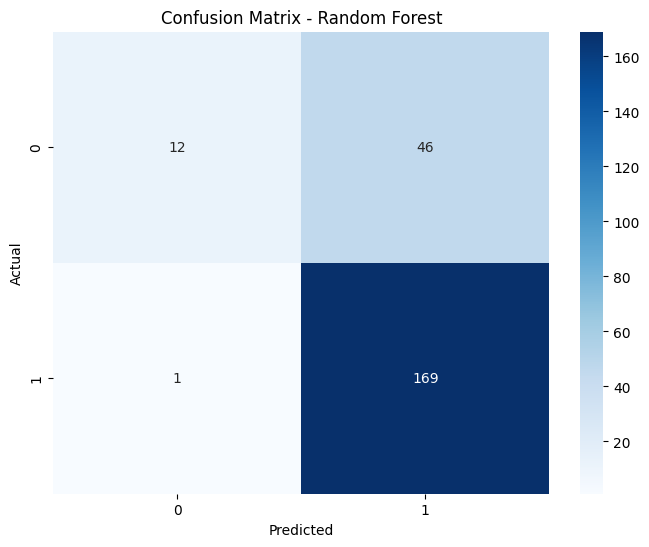


Gradient Boosting:
  Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
  Accuracy: 0.8904
  Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79        58
           1       0.93      0.92      0.93       170

    accuracy                           0.89       228
   macro avg       0.85      0.86      0.86       228
weighted avg       0.89      0.89      0.89       228

  Confusion Matrix:
 [[ 46  12]
 [ 13 157]]


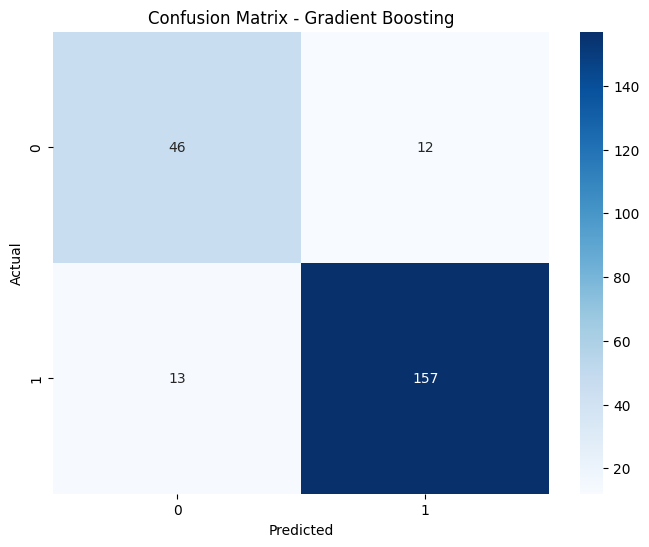


SVM:
  Best Parameters: {'C': 0.1, 'kernel': 'linear'}
  Accuracy: 0.7456
  Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.03      0.06        58
           1       0.75      0.99      0.85       170

    accuracy                           0.75       228
   macro avg       0.62      0.51      0.46       228
weighted avg       0.69      0.75      0.65       228

  Confusion Matrix:
 [[  2  56]
 [  2 168]]


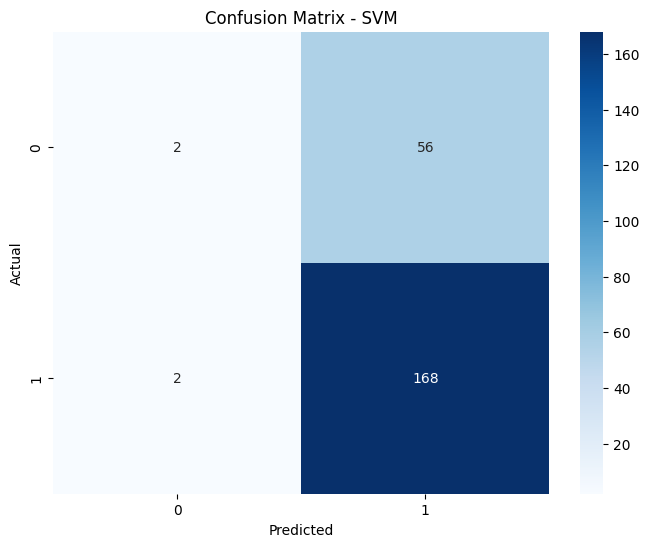


Best Model: Gradient Boosting with accuracy: 0.8904


In [36]:
#-------------------- Model Selection --------------------

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv("Fraudulent_online_shops_dataset.csv")
except FileNotFoundError:
    print("Error: File 'Fraudulent_online_shops_dataset.csv' not found. Please ensure it's in the correct directory.")
    exit()

# Preprocessing
# Handle categorical features (example: one-hot encoding, you might need to adjust based on your data)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features and target
X = df.drop('Presence of credit card payment', axis=1)
y = df['Presence of credit card payment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection and Evaluation
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

param_grids = {
    "Logistic Regression": {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    "Gradient Boosting": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    "SVM": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

best_models = {}
results = {}

for name, model in models.items():
    print(f"Training and evaluating {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

    # Impute missing values for each model training
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # Choose your imputation strategy
    X_train_imputed = imputer.fit_transform(X_train) # Impute training data

    # Scale the imputed training data
    scaler = StandardScaler()
    grid_search.fit(scaler.fit_transform(X_train_imputed), y_train)  # Fit grid search on scaled and imputed data

    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Impute and scale the test data before prediction
    X_test_imputed = imputer.transform(X_test)
    X_test_scaled_for_pred = scaler.transform(X_test_imputed) # Use a different variable name to avoid confusion

    y_pred = best_model.predict(X_test_scaled_for_pred) # Use the correctly scaled test data
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": matrix,
        "best_params": grid_search.best_params_
    }

# Print and visualize results
print("\nModel Evaluation Results:")
for name, result in results.items():
    print(f"\n{name}:")
    print(f"  Best Parameters: {result['best_params']}")
    print(f"  Accuracy: {result['accuracy']:.4f}")
    print("  Classification Report:\n", result['classification_report'])
    print("  Confusion Matrix:\n", result['confusion_matrix'])

    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Find the best model based on accuracy
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]['accuracy']:.4f}")